In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import country_converter as coco
## TSA ##
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter("ignore", category=FutureWarning) 

In [2]:
data = pd.read_csv('./hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# print(data.shape)
# print(data.isnull().sum())

In [4]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                                percent_missing
hotel                                  0.000000
total_of_special_requests              0.000000
required_car_parking_spaces            0.000000
adr                                    0.000000
customer_type                          0.000000
days_in_waiting_list                   0.000000
deposit_type                           0.000000
booking_changes                        0.000000
assigned_room_type                     0.000000
reserved_room_type                     0.000000
previous_bookings_not_canceled         0.000000
previous_cancellations                 0.000000
is_repeated_guest                      0.000000
reservation_status                     0.000000
distribution_channel                   0.000000
reservation_status_date                0.000000
meal                                   0.000000
babies                                 0.000000
adults                                 0.000000
stays_in_week_nights                   0

In [5]:
data = data.drop('company',axis = 1) # drop company column
data = data.drop('agent',axis = 1)
data = data.drop('children',axis = 1)
data["country"].fillna("other country", inplace = True)

In [6]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

Where do guests come from ?? where is our target countries ??

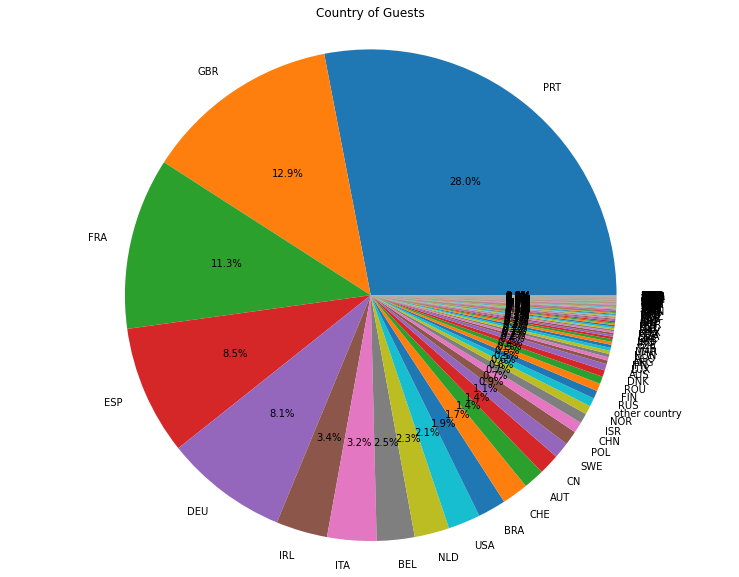

In [8]:
#### Where do guests come from
country = pd.DataFrame(data.loc[data["is_canceled"] == 0]["country"].value_counts())
country.rename(columns={"country": "#reservations"},inplace=True)
# print(country)
totalGuests = sum(data["is_canceled"]==0)
# print(totalGuests)
country["%reservations"] = country["#reservations"]/totalGuests*100
# print(country)
country["country"] = country.index
# print(country)
plt.figure(figsize =(13,10))
plt.pie(country["#reservations"],labels=country["country"],radius=5,autopct='%1.1f%%')
plt.title('Country of Guests')
plt.axis('equal')
plt.show()

As you can see from this chart that most guests are from Europe 

In [9]:
cc = coco.CountryConverter()
continents = []
for index, row in data.iterrows():

    continent = cc.convert([row.country], to='continent')
    continents.append(continent)
cont_df = pd.DataFrame(continents, columns=['continent'])
bookings = pd.concat([data, cont_df], 1)
cont_df.head()

bookings = pd.concat([data, cont_df], 1)

sns.countplot(x='continent', data=bookings,order = bookings['continent'].value_counts().head(5).index)
plt.xlabel("Continent")
plt.ylabel("bookings")
plt.title("bookings in continents")
plt.show

other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex
other country not found in regex


KeyboardInterrupt: 

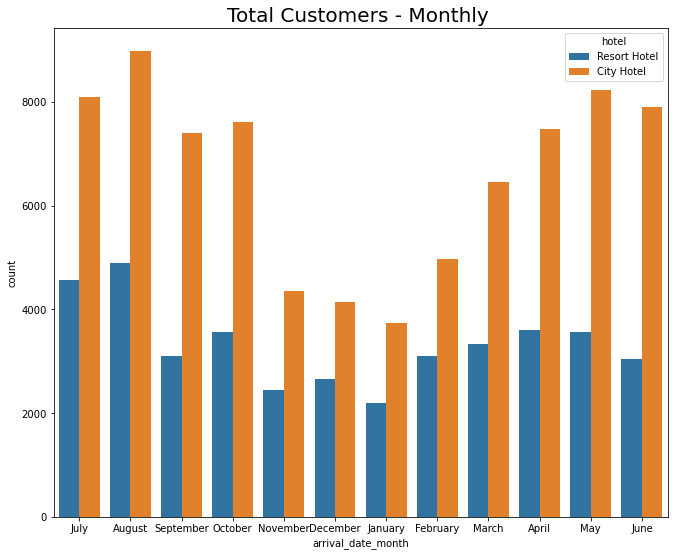

In [10]:
plt.figure(figsize =(11,9))
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data)

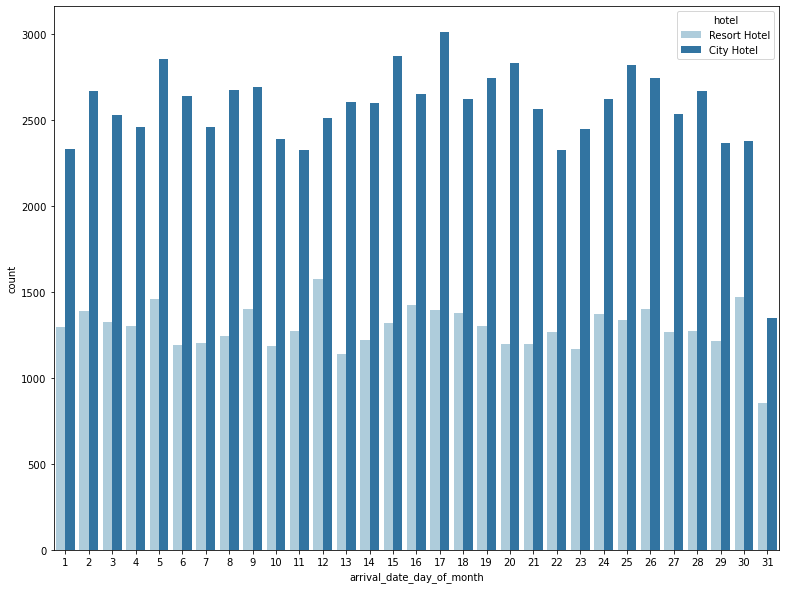

In [11]:
plt.figure(figsize =(13,10))
sns.countplot(data = data, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired',)
plt.show()

<ipython-input-15-3766b23c217d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_bookings['total_span_of_stay'] = confirmed_bookings.stays_in_week_nights + confirmed_bookings.stays_in_weekend_nights


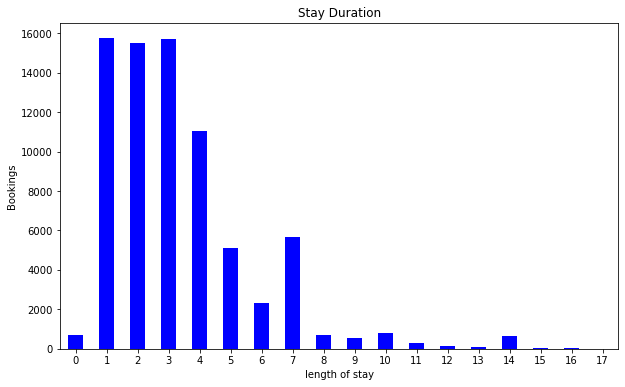

In [15]:
confirmed_bookings = data[data.is_canceled==0]
confirmed_bookings.head()
confirmed_bookings['total_span_of_stay'] = confirmed_bookings.stays_in_week_nights + confirmed_bookings.stays_in_weekend_nights
length_of_stay = confirmed_bookings.total_span_of_stay.value_counts().sort_index()
length_of_stay.head(18).plot(kind='bar', figsize=(10,6), title = 'length of stay', color='blue')
plt.title('Stay Duration')
plt.xlabel('length of stay')
plt.ylabel('Bookings')
plt.xticks(rotation='horizontal')
plt.show()

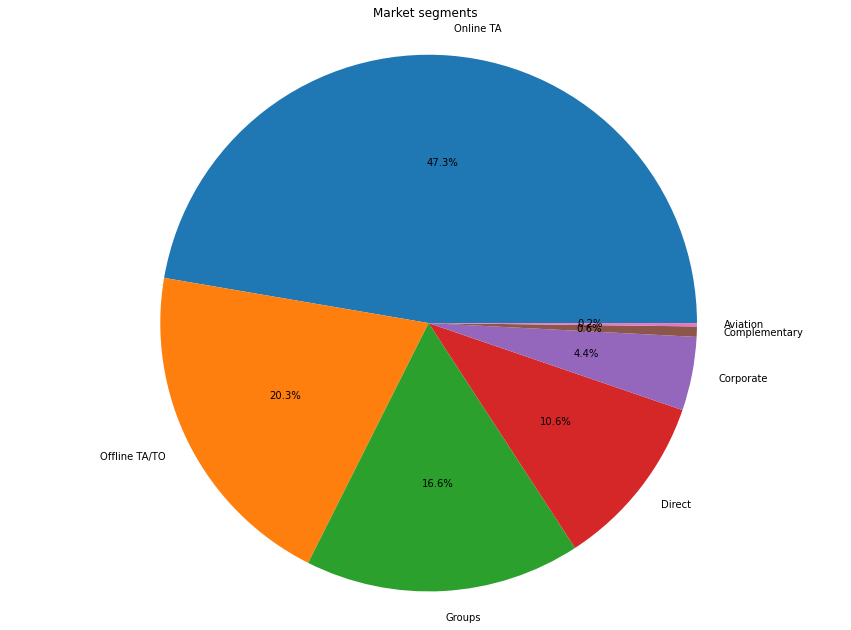

In [17]:
# total bookings per market segment (incl. canceled)
segments=data["market_segment"].value_counts()

# pie plot
plt.figure(figsize =(15,11))
plt.pie(segments.values,labels=segments.index,radius=5,autopct='%1.1f%%')
plt.title('Market segments')
plt.axis('equal')
plt.show()

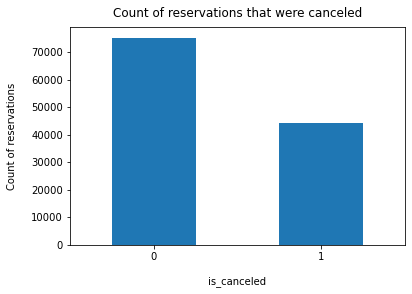

In [18]:
data['is_canceled'].value_counts().plot.bar(rot=0)
plt.xlabel("is_canceled", labelpad=14)
plt.ylabel("Count of reservations", labelpad=14)
plt.title("Count of reservations that were canceled", y=1.02);

In [19]:
corr_matrix = data.corr()
corr_matrix["is_canceled"].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293177
previous_cancellations            0.110140
adults                            0.059990
days_in_waiting_list              0.054193
adr                               0.047622
stays_in_week_nights              0.024771
arrival_date_year                 0.016732
arrival_date_week_number          0.008132
children                          0.005048
stays_in_weekend_nights          -0.001783
arrival_date_day_of_month        -0.006084
babies                           -0.032488
previous_bookings_not_canceled   -0.057355
is_repeated_guest                -0.084788
booking_changes                  -0.144371
required_car_parking_spaces      -0.195492
total_of_special_requests        -0.234706
Name: is_canceled, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

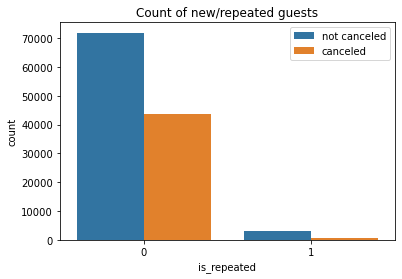

In [20]:
sns.countplot(x = data["is_repeated_guest"], hue = data['is_canceled'])
plt.title("Count of new/repeated guests")
plt.xlabel("is_repeated")
plt.legend(["not canceled", "canceled"])
plt.show

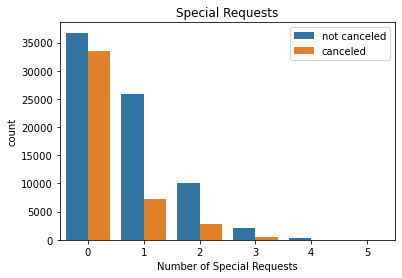

In [21]:
# plot special requests according to cancellations
# plt.figure(figsize=(10,5))
sns.countplot(x=data["total_of_special_requests"], hue=data["is_canceled"])
plt.title("Special Requests")
plt.xlabel("Number of Special Requests")
plt.legend(["not canceled", "canceled"])
plt.show()

0    111970
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64


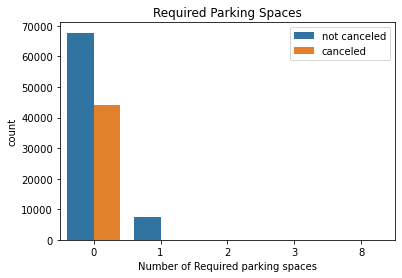

In [22]:
print(data["required_car_parking_spaces"].value_counts().sort_index())
# plt.figure(figsize=(10,5))
sns.countplot(x=data["required_car_parking_spaces"], hue=data["is_canceled"])
plt.title("Required Parking Spaces")
plt.xlabel("Number of Required parking spaces")
plt.legend(["not canceled", "canceled"])
plt.show()

0     101310
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
11         2
12         2
13         5
14         5
15         3
16         2
17         2
18         1
20         1
21         1
Name: booking_changes, dtype: int64


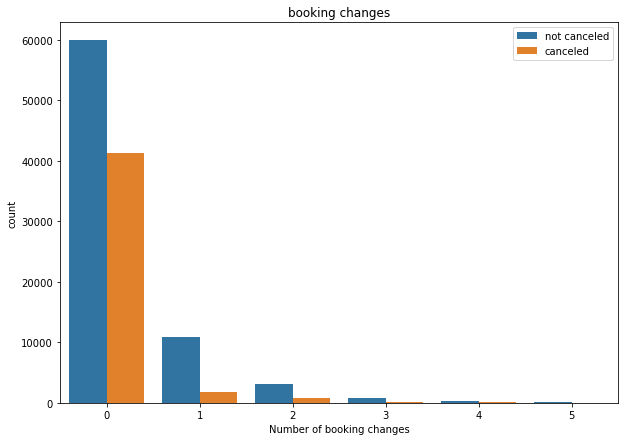

In [23]:
print(data["booking_changes"].value_counts().sort_index())
plt.figure(figsize=(10,7))
d2 = data[data["booking_changes"]<6]
sns.countplot(x=d2["booking_changes"], hue=data["is_canceled"])
plt.title("booking changes")
plt.xlabel("Number of booking changes")
plt.legend(["not canceled", "canceled"])
plt.show()

0     112902
1       6051
2        116
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: previous_cancellations, dtype: int64


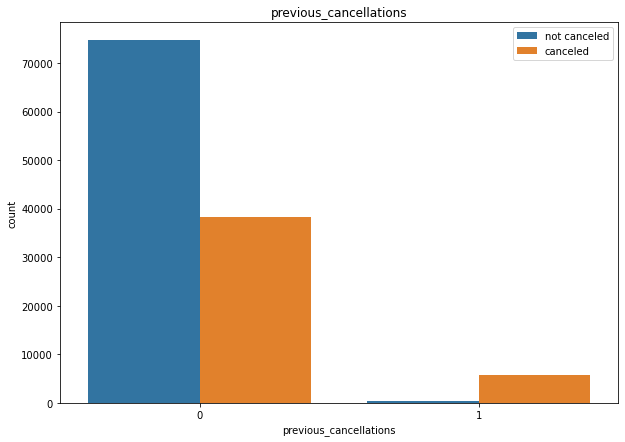

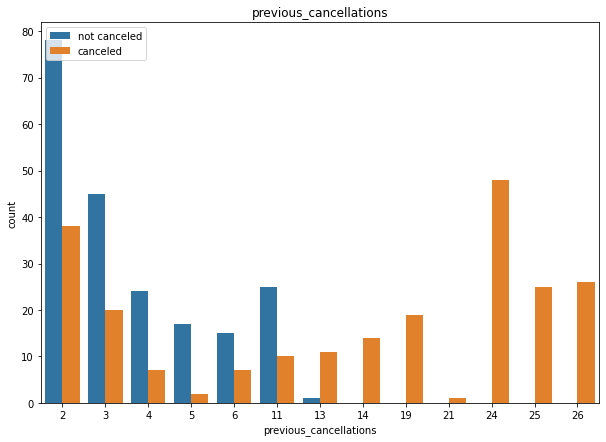

In [24]:
print(data["previous_cancellations"].value_counts().sort_index())
plt.figure(figsize=(10,7))
d2 = data[data["previous_cancellations"]<2]
sns.countplot(x=d2["previous_cancellations"], hue=data["is_canceled"])
plt.title("previous_cancellations")
# plt.xlabel("Number o")
plt.legend(["not canceled", "canceled"])
plt.show()
plt.figure(figsize=(10,7))
d2 = data[data["previous_cancellations"]>1]
sns.countplot(x=d2["previous_cancellations"], hue=data["is_canceled"])
plt.title("previous_cancellations")
# plt.xlabel("Number o")
plt.legend(["not canceled", "canceled"])
plt.show()

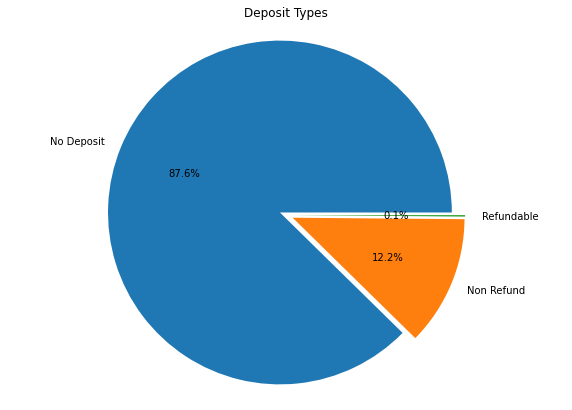

In [25]:
# calculate deposit type instances percentage in data
types=data["deposit_type"].value_counts()
explode = (0.2,0.2,0.2)
# pie plot
plt.figure(figsize =(10,7))
plt.pie(types.values,labels=types.index,radius=5,autopct='%1.1f%%',explode = explode)
plt.title('Deposit Types')
plt.axis('equal')
plt.show()

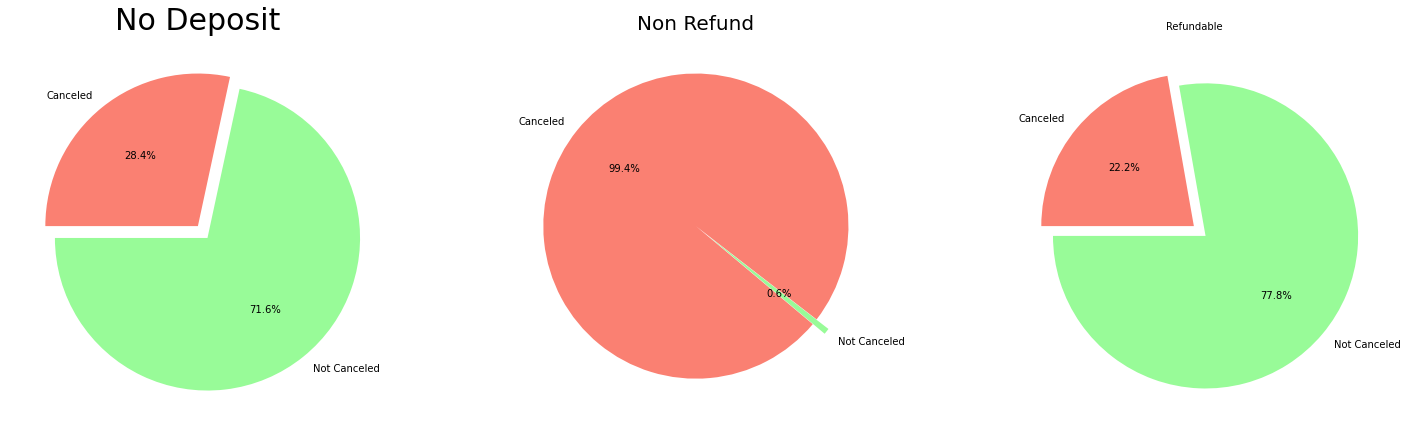

In [26]:
noRefund_notC = (data[data["deposit_type"]=="Non Refund"]["is_canceled"]==0).sum()
noRefund_C = (data[data["deposit_type"]=="Non Refund"]["is_canceled"]==1).sum()
refund_notC = (data[data["deposit_type"]=="Refundable"]["is_canceled"]==0).sum()
refund_C = (data[data["deposit_type"]=="Refundable"]["is_canceled"]==1).sum()
noDeposit_notC = (data[data["deposit_type"]=="No Deposit"]["is_canceled"]==0).sum()
noDeposit_C = (data[data["deposit_type"]=="No Deposit"]["is_canceled"]==1).sum()

df_deposit_type = pd.DataFrame(index=["Not Canceled", "Canceled"])
df_deposit_type["no_deposit"] = [noDeposit_notC, noDeposit_C]
df_deposit_type["non_refund"] = [noRefund_notC, noRefund_C]
df_deposit_type["refundable"] = [refund_notC, refund_C]

# pie plot of cancellations according to deposit type
# cancel_labels = ["cancelled", "not_cancelled"]
fig, dx = plt.subplots(1,3, figsize=(21,6))
explode = (0.1,0.0)

dx[0].pie(df_deposit_type["no_deposit"], labels=df_deposit_type.index, autopct='%1.1f%%',
          colors=['palegreen','salmon'], explode = explode , startangle = 180)
dx[0].set_title("No Deposit",size=30)

dx[1].pie(df_deposit_type["non_refund"], labels=df_deposit_type.index, autopct='%1.1f%%',
          colors=['palegreen','salmon'], explode = explode, startangle = 320)
dx[1].set_title("Non Refund",size=20)

dx[2].pie(df_deposit_type["refundable"], labels=df_deposit_type.index, autopct='%1.1f%%',
          colors=['palegreen','salmon'], explode = explode, startangle = 180)
dx[2].set_title("Refundable",size=10)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='meal', ylabel='count'>

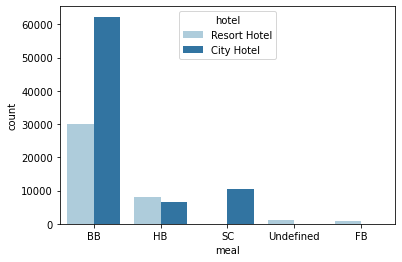

In [27]:
sns.countplot(palette='Paired' ,hue= 'hotel', x='meal', data=data,
              order = data['meal'].value_counts().index)

<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

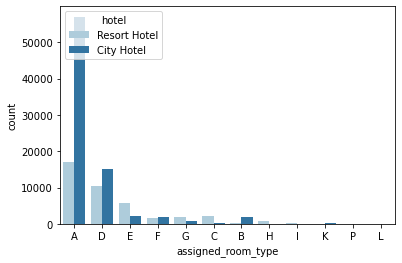

In [28]:
sns.countplot(palette='Paired' ,hue= 'hotel', x='assigned_room_type', data=data,
              order = data['assigned_room_type'].value_counts().index)

In [29]:
####### Time Series Analysis #######

In [30]:
df = pd.read_csv("hotel_bookings.csv")

From the first look, we can see that column Company has a lot of NAN values.

In [31]:
percNAN = (df['company'].isna().sum()/df.shape[0])*100
percNAN

94.30689337465449

Since 94% of the column is NAN, we can remove it.

In [32]:
df.drop('company', inplace=True, axis=1)

Let's combine the arrival year, month and day into one column and make it the dataframe index.

In [33]:
df.rename(columns = {'arrival_date_year' : 'year', 'arrival_date_month':'month', 'arrival_date_day_of_month':'day'},inplace = True)
df['arrival_date'] = pd.to_datetime(df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+df['day'].astype(str), infer_datetime_format=True)
df.head()

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [34]:
df.set_index(df['arrival_date'], inplace=True)
df.head()

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2015-07-01,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2015-07-01,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
2015-07-01,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
2015-07-01,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


Let's explore column adr. 

In [35]:
df.nlargest(5,'adr', 'first')

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
arrival_date,,,,,,,,,,,,,,,,,,,,,
2016-03-25,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,0,Transient,5400.0,0,0,Canceled,2016-02-19,2016-03-25
2017-05-09,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.0,0,Transient,510.0,0,0,Check-Out,2017-05-10,2017-05-09
2015-07-15,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,No Deposit,NaN,0,Transient,508.0,1,0,Check-Out,2015-07-16,2015-07-15
2016-12-31,City Hotel,0,81,2016,December,53,31,1,1,2,...,No Deposit,NaN,0,Transient-Party,451.5,0,4,Check-Out,2017-01-02,2016-12-31
2017-08-01,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,No Deposit,314.0,0,Transient,450.0,0,0,Canceled,2016-07-22,2017-08-01


We can see that there is an outlier of 5400. We can remove it.

In [36]:
df = df[df['adr'] != 5400]
df.nlargest(5,'adr', 'first')

,hotel,is_canceled,lead_time,year,month,arrival_date_week_number,day,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
arrival_date,,,,,,,,,,,,,,,,,,,,,
2017-05-09,City Hotel,0,0,2017,May,19,9,0,1,1,...,No Deposit,159.0,0,Transient,510.0,0,0,Check-Out,2017-05-10,2017-05-09
2015-07-15,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,No Deposit,NaN,0,Transient,508.0,1,0,Check-Out,2015-07-16,2015-07-15
2016-12-31,City Hotel,0,81,2016,December,53,31,1,1,2,...,No Deposit,NaN,0,Transient-Party,451.5,0,4,Check-Out,2017-01-02,2016-12-31
2017-08-01,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,No Deposit,314.0,0,Transient,450.0,0,0,Canceled,2016-07-22,2017-08-01
2017-08-13,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,No Deposit,250.0,0,Transient,437.0,0,0,Canceled,2017-08-03,2017-08-13


Now we can plot ADR vs time.

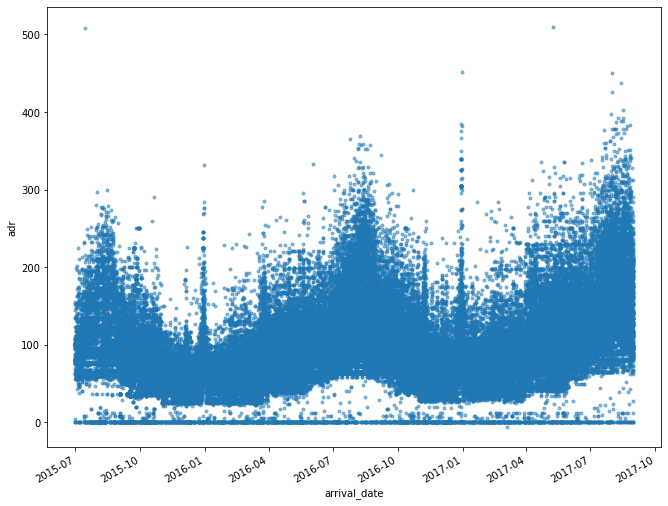

In [37]:
ax = df['adr'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True);
ax[0].set_ylabel("adr");

There is an interesting pattern in the summer here. Let's zoom in on it.

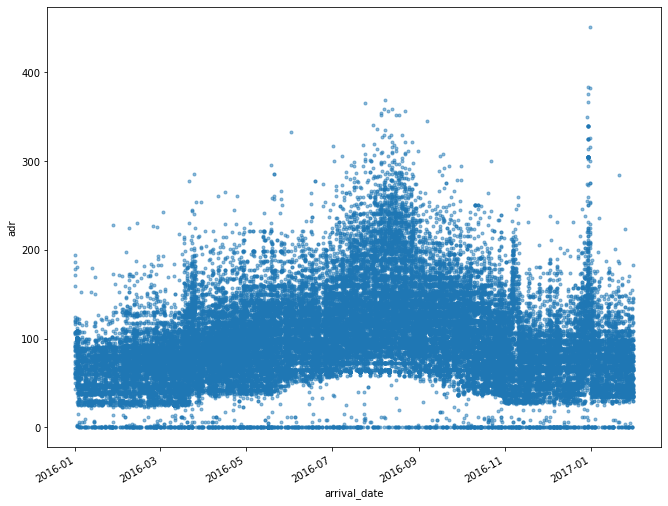

In [38]:
ax = df.loc['2016-01':'2017-01', 'adr'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True);
ax[0].set_ylabel("adr");

It can be inferred that the Average Daily Rate increases in the summer (months 7 to 8) which makes sense since the average daily rate is the total number of transactions over number of staying nights and both generally increase in the summer.

However, there are too many samples to have a clear observation. Let's resample our data such that the weekly observations are plotted.

In [39]:
df_weekly_mean = df['adr'].resample('W').mean()
df_weekly_mean.head(3)

arrival_date
2015-07-05     90.397743
2015-07-12     94.156404
2015-07-19    101.486901
Freq: W-SUN, Name: adr, dtype: float64

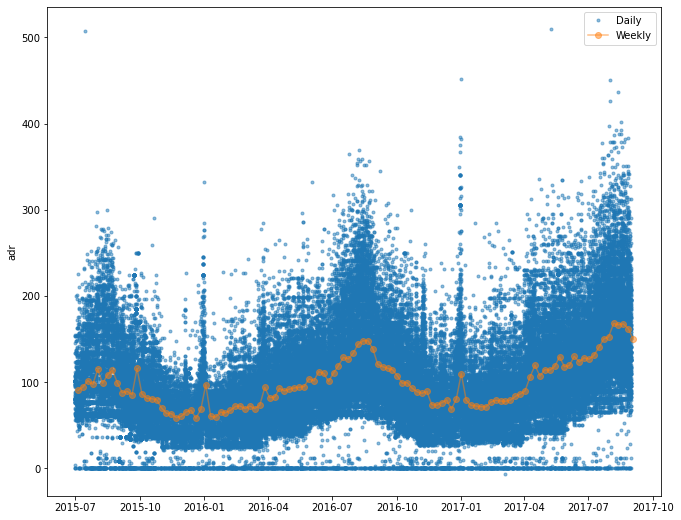

In [40]:
fig, ax = plt.subplots(figsize=(11,9))
ax.plot(df['adr'],marker='.', alpha=0.5, linestyle='None', label = 'Daily');
ax.plot(df_weekly_mean,marker='o', alpha=0.5, linestyle='-', label = 'Weekly');
ax.legend();
ax.set_ylabel("adr");

Resampling outputs a lower frequency data. What if we can achieve similar results without decreasing the frequency? This is where rolling is needed. Rolling overlaps and "rolls" the data so that the output is of the same frequency as the original. We will use 7-day rolling. We do so by first getting the mean for repeated days by resampling to 1D and rolling the output.

In [41]:
df_7d = df['adr'].resample("1d").mean().rolling(window=7, min_periods=1).mean()
df_7d.head(10)

arrival_date
2015-07-01    92.828934
2015-07-02    87.517209
2015-07-03    90.739151
2015-07-04    89.449932
2015-07-05    91.560474
2015-07-06    91.376906
2015-07-07    91.548697
2015-07-08    89.714791
2015-07-09    89.492294
2015-07-10    91.608639
Freq: D, Name: adr, dtype: float64

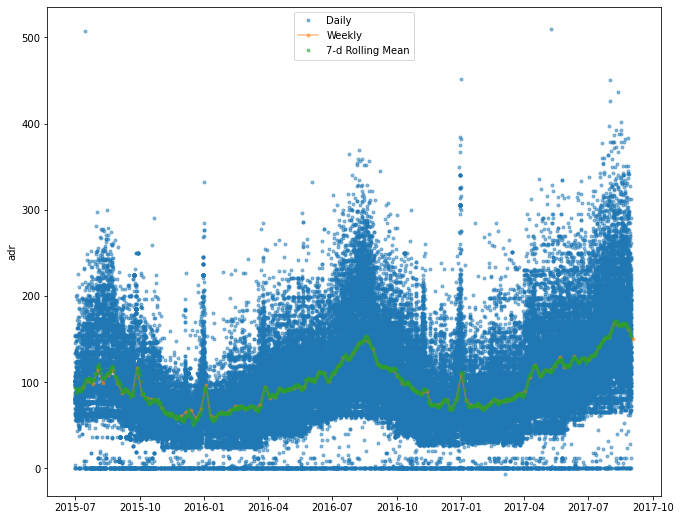

In [42]:
fig, ax = plt.subplots(figsize=(11,9))
ax.plot(df['adr'],marker='.', alpha=0.5, linestyle='None', label = 'Daily');
ax.plot(df_weekly_mean,marker='.', alpha=0.5, linestyle='-', label = 'Weekly');
ax.plot(df_7d,marker='.', alpha=0.5, linestyle='None', label = '7-d Rolling Mean');
ax.legend();
ax.set_ylabel("adr");

As you can see, the results are identical.
Now, we analyze the trend in the data.

In [43]:
df_365 = df['adr'].resample("1d").mean().rolling(window=365, center=True, min_periods=360).mean()

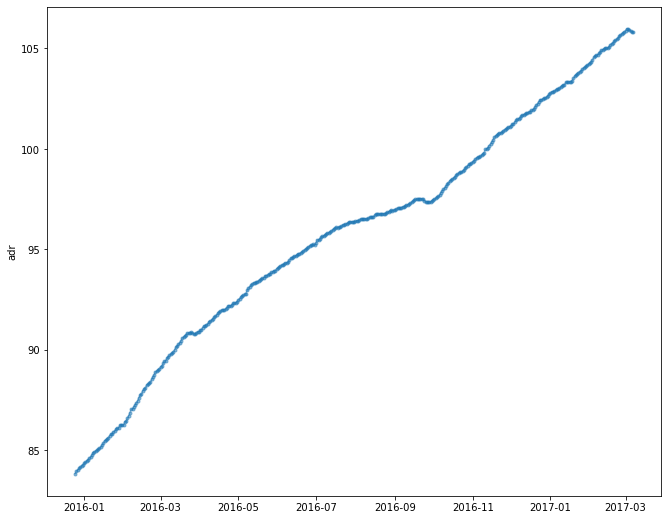

In [44]:
fig, ax = plt.subplots(figsize=(11,9))
ax.plot(df_365,marker='.', alpha=0.5, linestyle='-', label = 'Trend');
ax.set_ylabel("adr");

Working with the resampled data, we analyze the seasonality. 

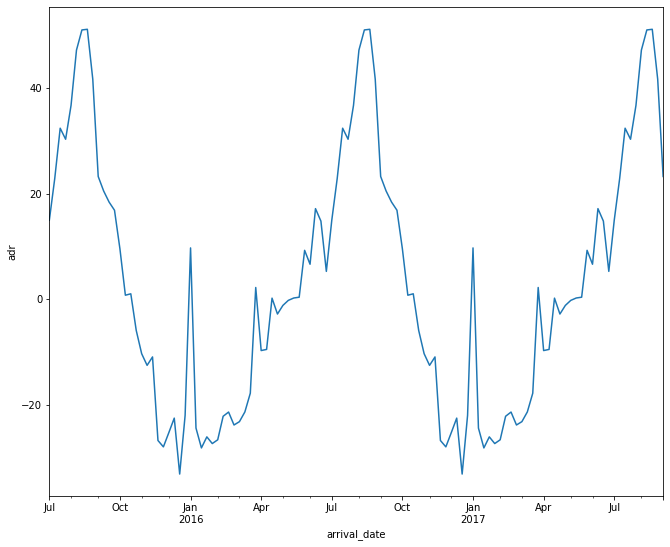

In [45]:
sd = seasonal_decompose(df_weekly_mean, model='additive').seasonal.plot(figsize=(11,9))
sd.set_ylabel("adr");

Looking at the result, we can further prove that there is a seasonality component in our data, which was intuitive from the original data.
This, the variance in the data and the trend make the time series unstationary. Let's try to make it stationary using SARIMA.

First, we split the dataset into training and test sets.

Then we take log10 of the data to remove the variance in the data.

In [46]:
values = df_weekly_mean.values
size = 90
train, test = values[0:size], values[size:len(values)]
train_log = np.log10(train)
test_log = np.log10(test)

Analyzing the partial autocorrelation and autocorrelation of the data gives us a starting point for the q and p parameters.

From the graphs, we can deduce that p = 1 and q = 6. We will also use d = 1 for detrending.

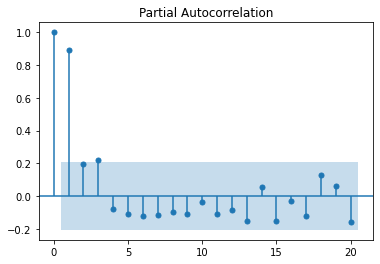

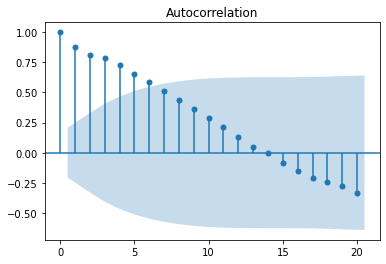

In [47]:
plot_pacf(train);
plot_acf(train);

In [48]:
original = train_log.copy().tolist()
predictions = original.copy()
for t in range(len(test_log)):
    model = sm.tsa.statespace.SARIMAX(original, order=(1,1,6))
    model_fit = model.fit(maxiter=200)
    output = model_fit.forecast()
    predictions.append(output[0])
    original.append(test_log[t])
    print('predicted=%f, expected=%f' % (output[0], test_log[t]))

predicted=1.902303, expected=1.934728
predicted=1.923405, expected=1.953339
predicted=1.941954, expected=2.024739
predicted=2.001936, expected=2.076426
predicted=2.049965, expected=2.029407
predicted=2.037279, expected=2.057713
predicted=2.073551, expected=2.055711
predicted=2.052509, expected=2.072089
predicted=2.073626, expected=2.110397
predicted=2.108948, expected=2.071048
predicted=2.072981, expected=2.075995
predicted=2.089210, expected=2.112818
predicted=2.099757, expected=2.091188
predicted=2.090076, expected=2.107008
predicted=2.112145, expected=2.102216
predicted=2.098882, expected=2.117082
predicted=2.116102, expected=2.146075
predicted=2.133555, expected=2.175807
predicted=2.161536, expected=2.183229
predicted=2.178354, expected=2.225059
predicted=2.219384, expected=2.221058
predicted=2.219270, expected=2.223938
predicted=2.235646, expected=2.209494
predicted=2.221536, expected=2.174707


After forecasting, we will draw the predicted values against the real values. As shown in the figure, they are very close.

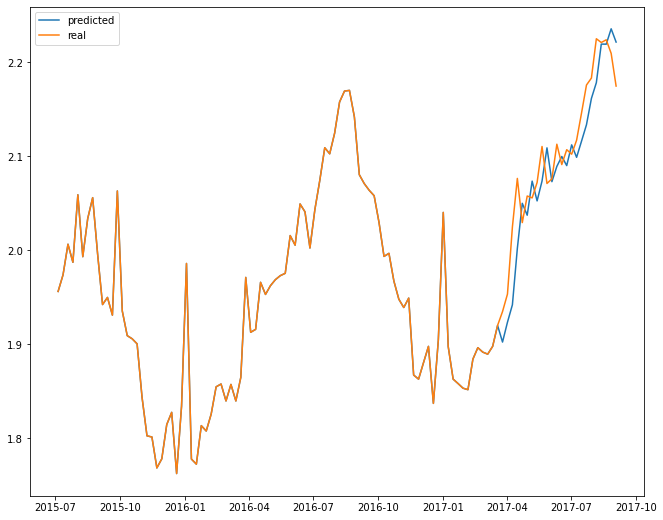

In [49]:
fig, ax = plt.subplots(figsize = (11,9))
plt.plot(df_weekly_mean.index, predictions)
plt.plot(df_weekly_mean.index, original)
ax.legend(["predicted", "real"]);